### Library Imports

In [25]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import os
from itertools import zip_longest

### Read Data File

In [5]:
nb_name = "1.0-jp-initial-data-exploration"

dataset_1 = 'query-sdg-full_20220312_92k.csv' # _1, _2 etc.. as need to list more than one data set being read in

In [6]:
df = pd.read_csv('../../data/raw/'+dataset_1, sep='|', header=0) 

# Pandas will start looking from where your current python file is located. 
# Therefore you can move from your current directory to where your data is located with '..'

In [7]:
df.head(4)

,ptr_id,articletype_id,sdg_lst,authors,title,content,keywords,institution_id
0,13,13.0,"14, 2","{""Jansen, Jonathan D.""}",Autonomy and accountability in the regulation ...,This article examines the struggles of the Sou...,"{Autonomy,Learning,Performance,Teaching,""Gover...",1
1,14,14.0,2,"{""Jansen, Jonathan D.""}",Intellectuals under fire,Looks at the status of intellectuals in South ...,"{""Cultural policy"",Democracy,""Political system...",1
2,16,16.0,2,"{""Jansen, Jonathan D.""}",Mode 2 knowledge and institutional life: takin...,This paper examines the response of a black un...,"{""Higher education"",""Information technology"",""...",1
3,17,17.0,"14, 1","{""Jansen, Jonathan D.""}",Political symbolism as policy craft : explaini...,The policy literature in developing countries ...,"{Apartheid,""Educational change"",""Educational p...",1


In [8]:
# check the types of data in the set

df.dtypes

ptr_id              int64
articletype_id    float64
sdg_lst            object
authors            object
title              object
content            object
keywords           object
institution_id      int64
dtype: object

### Check Data Set's Quality

In [9]:
# Check the number of nulls

df.isnull().sum() # Efficient query for checking the number of nulls accross columns in pandas

ptr_id            0
articletype_id    1
sdg_lst           1
authors           0
title             0
content           0
keywords          0
institution_id    0
dtype: int64

In [10]:
# Drop na values

df = df.dropna()

In [11]:
# does the ptr_id and article_type_id match 

# Find the number of mismatches in id's

len([i for i in list(df.ptr_id == df.articletype_id) if i == False ])

0

In [26]:
# get the number different sdg's listed

listed_number = list()

zero_list = [0,0,0,0,0,0,0] # 7 zeroes to list as the maximum number of listed sdg's per article is 7

for i in df.sdg_lst.values:

    # remove ',' in the string and split the string by white space to get a list
    
    split = [int(z)for z in i.replace(',','').split()]
    
    # replace zeroes in the zero list with corresponding entry of listed sdg on article
    # eg. [14,2] + [0,0,0,0,0,0,0] = [14,2,0,0,0,0,0] -> done for feature creation
    
    add_lists = [sum(n) for n in zip_longest(split, zero_list, fillvalue=0)]
    
    listed_number.append(len(split))
    
# Get a column listing the number of sdg per article for distributional visualisation 
    
df['no_listed_sdg'] = listed_number

[14, 2, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[14, 1, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 0, 0]
[12, 15, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[16, 0, 0, 0, 0, 0, 0]
[16, 0, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[8, 14, 0, 0, 0, 0, 0]
[2, 1, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[16, 0, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[2, 0

[2, 0, 0, 0, 0, 0, 0]
[3, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[13, 17, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[2, 14, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[4, 5, 0, 0, 0, 0, 0]
[12, 7, 0, 0, 0, 0, 0]
[13, 0, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[5, 16, 0, 0, 0, 0, 0]
[5, 3, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 0, 0]
[16, 17, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[5, 3, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[3, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[16, 0, 0, 0, 0, 0, 0]
[13, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 

[15, 0, 0, 0, 0, 0, 0]
[3, 0, 0, 0, 0, 0, 0]
[3, 0, 0, 0, 0, 0, 0]
[16, 0, 0, 0, 0, 0, 0]
[1, 8, 0, 0, 0, 0, 0]
[13, 0, 0, 0, 0, 0, 0]
[5, 7, 0, 0, 0, 0, 0]
[1, 8, 0, 0, 0, 0, 0]
[17, 0, 0, 0, 0, 0, 0]
[16, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[1, 14, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[8, 1, 0, 0, 0, 0, 0]
[4, 3, 0, 0, 0, 0, 0]
[13, 0, 0, 0, 0, 0, 0]
[4, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[7, 5, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[16, 0, 0, 0, 0, 0, 0]
[17, 0, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 0, 0, 0]
[1, 9, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[10, 0, 0, 0, 0, 0, 0]
[6, 2, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[15, 13, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[9, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[1, 10, 0, 0, 0, 0, 0]
[10, 1, 9, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[2, 0, 

[2, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[3, 0, 0, 0, 0, 0, 0]
[10, 6, 0, 0, 0, 0, 0]
[14, 15, 0, 0, 0, 0, 0]
[9, 1, 0, 0, 0, 0, 0]
[16, 12, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 13, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[17, 15, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[10, 14, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[3, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[14, 10, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[12, 15, 0, 0, 0, 0, 0]
[16, 17, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[13, 16, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[11, 0, 0, 0, 0, 0, 0]
[1, 8, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[1, 8, 0, 0, 0, 0, 0]
[13, 0, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[10, 0, 0, 0, 0, 0, 0]
[15, 16, 0, 0

[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[14, 15, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[14, 15, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[13, 15, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[16, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[2, 7, 9, 0, 0, 0, 0]
[16, 17, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[3, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[7, 12, 16, 17, 0, 0, 0]
[7, 12, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[13, 15, 0, 0, 0, 0, 0]
[2, 13, 0, 0, 0, 0, 0]
[13, 0, 0, 0, 0, 0, 0]
[12, 15, 0, 0, 0, 0, 0]
[12, 15, 0, 0, 0, 0, 0]
[7, 8, 0, 0, 0, 0, 0]
[17, 2, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[10, 17, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[13, 2, 0, 0, 0, 0, 0]
[15, 0, 0, 

[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[7, 15, 0, 0, 0, 0, 0]
[5, 6, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[3, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[8, 15, 17, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 10, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[3, 2, 1, 0, 0, 0, 0]
[3, 0, 0, 0, 0, 0, 0]
[15, 17, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[13, 0, 0, 0, 0, 0, 0]
[16, 15, 0, 0, 0, 0, 0]
[17, 2, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[4, 0, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[5, 6, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 1, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]


[8, 7, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 6, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 16, 0, 0, 0, 0, 0]
[13, 15, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[16, 14, 15, 2, 8, 0, 0]
[16, 6, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[13, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[16, 5, 6, 0, 0, 0, 0]
[4, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[1, 9, 0, 0, 0, 0, 0]
[15, 1, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[10, 13, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[4, 16, 5, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0,

[15, 0, 0, 0, 0, 0, 0]
[1, 10, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[10, 6, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 16, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[8, 2, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[14, 15, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[3, 0, 0, 0, 0, 0, 0]
[7, 17, 0, 0, 0, 0, 0]
[2, 6, 0, 0, 0, 0, 0]
[4, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[3, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[4, 0, 0, 0, 0, 0, 0]
[2, 15, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[2, 14, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[5, 7, 12, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[11, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[3, 5, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[7, 12, 15, 0, 0, 0, 0]
[7, 15, 17, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]


[4, 5, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[13, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[10, 17, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[5, 10, 17, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[16, 15, 0, 0, 0, 0, 0]
[6, 5, 0, 0, 0, 0, 0]
[15, 5, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 2, 0, 0, 0, 0, 0]
[15, 16, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 0, 0, 0]
[15, 1, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[10, 2, 0, 0, 0, 0, 0]
[4, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[12, 13, 0, 0, 0, 0, 0]
[1, 15, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[16, 0, 0, 0, 0, 0, 0]
[16, 0, 0, 0, 0, 0, 0]
[13, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[15, 8, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[10, 15, 8, 0, 0, 0, 0

[6, 1, 3, 0, 0, 0, 0]
[1, 3, 0, 0, 0, 0, 0]
[5, 10, 0, 0, 0, 0, 0]
[1, 15, 0, 0, 0, 0, 0]
[3, 5, 0, 0, 0, 0, 0]
[16, 0, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[7, 1, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[13, 15, 0, 0, 0, 0, 0]
[1, 13, 15, 16, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[17, 1, 0, 0, 0, 0, 0]
[17, 1, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[3, 0, 0, 0, 0, 0, 0]
[3, 16, 0, 0, 0, 0, 0]
[16, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[17, 0, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[2, 17, 16, 8, 0, 0, 0]
[13, 0, 0, 0, 0, 0, 0]
[9, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[3, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[2, 15, 0, 0, 0, 0, 0]
[16, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[16, 17, 0, 0, 0, 0, 0]
[5, 6, 0, 0, 0, 0, 0]
[17, 1, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0

[1, 0, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 0, 0]
[1, 10, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[16, 0, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[10, 14, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[7, 1, 0, 0, 0, 0, 0]
[15, 14, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[2, 10, 0, 0, 0, 0, 0]
[12, 6, 0, 0, 0, 0, 0]
[10, 8, 6, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[16, 17, 0, 0, 0, 0, 0]
[10, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[1, 14, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[13, 14, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[7, 0

[17, 1, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[2, 17, 15, 7, 5, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[2, 13, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[16, 15, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[10, 11, 0, 0, 0, 0, 0]
[5, 17, 1, 7, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[16, 0, 0, 0, 0, 0, 0]
[2, 10, 0, 0, 0, 0, 0]
[11, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[3, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[14, 10, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[17, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[16, 0, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[

[10, 0, 0, 0, 0, 0, 0]
[17, 0, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[10, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[10, 0, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[12, 0, 0, 0, 0, 0, 0]
[1, 5, 11, 0, 0, 0, 0]
[9, 1, 7, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[7, 6, 0, 0, 0, 0, 0]
[10, 0, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[15, 1, 0, 0, 0, 0, 0]
[1, 10, 17, 0, 0, 0, 0]
[10, 14, 0, 0, 0, 0, 0]
[10, 17, 0, 0, 0, 0, 0]
[16, 12, 15, 0, 0, 0, 0]
[3, 13, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[9, 0, 0, 0, 0, 0, 0]
[15, 10, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 0, 0]
[1, 7, 0, 0, 0, 0, 0]
[9, 0, 0, 0, 0, 0, 0]
[5, 7, 0, 0, 0, 0, 0]
[7, 17, 0, 0, 0, 0, 0]
[1

[9, 0, 0, 0, 0, 0, 0]
[11, 10, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 10, 0, 0, 0, 0, 0]
[9, 0, 0, 0, 0, 0, 0]
[7, 1, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[9, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[12, 0, 0, 0, 0, 0, 0]
[10, 11, 9, 6, 0, 0, 0]
[1, 9, 10, 0, 0, 0, 0]
[10, 0, 0, 0, 0, 0, 0]
[10, 11, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[5, 10, 11, 0, 0, 0, 0]
[6, 9, 0, 0, 0, 0, 0]
[5, 15, 0, 0, 0, 0, 0]
[9, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 6, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 12, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[15, 16, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[6, 11, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[1, 10, 0, 0, 0, 0, 0]
[9, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 

[9, 1, 10, 0, 0, 0, 0]
[9, 10, 0, 0, 0, 0, 0]
[6, 16, 15, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[10, 1, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[1, 2, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[7, 9, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[13, 2, 0, 0, 0, 0, 0]
[10, 0, 0, 0, 0, 0, 0]
[5, 11, 0, 0, 0, 0, 0]
[1, 10, 9, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[1, 10, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[9, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[6, 9, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[5, 6, 0, 0, 0, 0, 0]
[16, 0, 0, 0, 0, 0, 0]
[10, 0, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[10, 11, 0, 0, 0, 0, 0]
[1, 10, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[10, 11, 0, 0, 0, 0, 0]
[9, 1, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[16, 15, 0

[12, 0, 0, 0, 0, 0, 0]
[5, 15, 0, 0, 0, 0, 0]
[5, 16, 0, 0, 0, 0, 0]
[10, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[2, 1, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[9, 0, 0, 0, 0, 0, 0]
[11, 9, 0, 0, 0, 0, 0]
[17, 16, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[9, 0, 0, 0, 0, 0, 0]
[6, 5, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[1, 6, 16, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[5, 6, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[9, 0, 0, 0, 0, 0, 0]
[17, 0, 0, 0, 0, 0, 0]
[10, 9, 0, 0, 0, 0, 0]
[4, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[4, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[10, 5, 0, 0, 0, 0, 0]
[9, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[10, 6, 0, 0, 0, 0, 0]
[10, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[16, 0, 0, 0, 0, 0, 0]
[9, 10, 0, 0, 0, 0, 0]
[5, 6, 0, 0, 0, 0, 0]
[16, 15, 0, 0, 0, 0, 0]
[11, 1

[6, 5, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 6, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[6, 11, 5, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[5, 16, 3, 6, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[15, 6, 0, 0, 0, 0, 0]
[5, 10, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[6, 16, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 6, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[5, 11, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[16, 5, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 11, 0, 0, 0, 0, 0]
[16, 4, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[5, 11, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[10, 0, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 0, 0, 0]
[15, 5, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[5, 6, 0, 0, 0, 0, 0]
[6, 9, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[12, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[10, 0, 0, 0

[2, 0, 0, 0, 0, 0, 0]
[10, 0, 0, 0, 0, 0, 0]
[5, 12, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[1, 9, 10, 0, 0, 0, 0]
[1, 17, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[5, 6, 16, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 1, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[9, 1, 10, 0, 0, 0, 0]
[10, 1, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[16, 15, 5, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[6, 5, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[1, 10, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[16, 6, 5, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[10, 0, 0, 0, 0, 0, 0]
[10, 1, 9, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[11, 5, 0, 0, 0, 0, 0]
[15, 1, 6, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[5, 11, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[5, 15, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[7, 9, 0, 0, 0, 0, 0]
[15, 1, 8, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[1, 10, 0, 0, 0, 0, 0]
[5, 6, 0, 0, 0, 0, 0]
[5, 0, 0

[9, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[17, 16, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[10, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[10, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[10, 9, 6, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 6, 0, 0, 0, 0, 0]
[5, 7, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[7, 5, 0, 0, 0, 0, 0]
[15, 5, 0, 0, 0, 0, 0]
[2, 6, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[10, 1, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[5, 6, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[11, 5, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0,

[6, 5, 0, 0, 0, 0, 0]
[10, 15, 17, 0, 0, 0, 0]
[9, 15, 0, 0, 0, 0, 0]
[9, 0, 0, 0, 0, 0, 0]
[5, 6, 0, 0, 0, 0, 0]
[9, 1, 10, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[10, 1, 11, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[2, 1, 10, 0, 0, 0, 0]
[6, 5, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[9, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[4, 0, 0, 0, 0, 0, 0]
[6, 5, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[6, 5, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[11, 10, 5, 0, 0, 0, 0]
[6, 9, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[15, 16, 5, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 10, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[10, 0, 0,

[11, 10, 1, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 13, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[5, 6, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 4, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[5, 6, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[9, 0, 0, 0, 0, 0, 0]
[9, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[4, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[3, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[1, 10, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[3, 4, 16, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[9, 0, 0, 0, 0, 0, 0]
[10, 11, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[10, 1, 0, 0, 0, 0, 0]
[11, 0, 0, 0, 0, 0, 0]
[10, 5, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[15, 6, 16, 0, 0, 0, 0]
[10, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[10, 9, 

[10, 0, 0, 0, 0, 0, 0]
[5, 6, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 6, 0, 0, 0, 0, 0]
[9, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[9, 1, 0, 0, 0, 0, 0]
[6, 5, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[10, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[5, 6, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[11, 0, 0, 0, 0, 0, 0]
[9, 6, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[1, 17, 10, 9, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[4, 16, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[11, 5, 0, 0, 0, 0, 0]
[3, 5, 0, 0, 0, 0, 0]
[9, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[9, 1, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 6, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[5, 6, 0, 0, 0, 0

[15, 1, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[6, 16, 0, 0, 0, 0, 0]
[9, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[1, 17, 10, 0, 0, 0, 0]
[5, 11, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[10, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[6, 5, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[5, 6, 0, 0, 0, 0, 0]
[16, 0, 0, 0, 0, 0, 0]
[10, 0, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[10, 2, 9, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[9, 1, 0, 0, 0, 0, 0]
[6, 16, 0, 0, 0, 0, 0]
[10, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 4, 3, 0, 0, 0, 0]
[13, 5, 0, 0, 0, 0, 0]
[5, 11, 0, 0, 0, 0, 0]
[4, 0, 0, 0, 0, 0, 0]
[9, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[9, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[9, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[7, 5, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[11, 10, 0, 0, 0, 0, 0]
[7, 5, 0, 0, 0, 0, 0]
[5, 9, 6, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[6, 10, 11, 0, 0, 0, 0]
[2, 10, 0, 0, 0, 0, 0]
[5, 0, 0, 

[12, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 6, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[11, 5, 10, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[15, 9, 7, 0, 0, 0, 0]
[5, 1, 0, 0, 0, 0, 0]
[6, 16, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[15, 16, 0, 0, 0, 0, 0]
[11, 5, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[1, 2, 0, 0, 0, 0, 0]
[16, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[6, 5, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[17, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[11, 5, 10, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[10, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[5, 6, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[6, 5, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[11, 10, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[15, 0, 0,

[5, 11, 6, 0, 0, 0, 0]
[5, 16, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[5, 9, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[10, 1, 0, 0, 0, 0, 0]
[11, 10, 0, 0, 0, 0, 0]
[5, 15, 0, 0, 0, 0, 0]
[1, 16, 0, 0, 0, 0, 0]
[6, 5, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[16, 0, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[10, 0, 0, 0, 0, 0, 0]
[3, 16, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[5, 6, 0, 0, 0, 0, 0]
[5, 11, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[4, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[9, 10, 6, 0, 0, 0, 0]
[11, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[9, 0, 0, 0, 0, 0, 0]
[5, 15, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[10, 9, 6, 5, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 16, 0, 0, 0, 0, 0]
[16, 6, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[5, 11, 0, 0, 0, 0, 0]
[2, 0, 0,

[5, 7, 12, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[11, 0, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[12, 0, 0, 0, 0, 0, 0]
[6, 11, 5, 0, 0, 0, 0]
[15, 2, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 6, 0, 0, 0, 0, 0]
[9, 0, 0, 0, 0, 0, 0]
[9, 5, 7, 0, 0, 0, 0]
[11, 0, 0, 0, 0, 0, 0]
[16, 15, 0, 0, 0, 0, 0]
[5, 16, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[6, 5, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[9, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[5, 6, 0, 0, 0, 0, 0]
[1, 10, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[9, 7, 0, 0, 0, 0, 0]
[9, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[10, 0, 0, 0, 0, 0, 0]
[8, 7, 1, 0, 0, 0, 0]
[14, 15, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[16, 5, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 0, 0]
[9, 6, 5, 11, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[3, 5, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[10, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0

[5, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[10, 11, 0, 0, 0, 0, 0]
[1, 5, 0, 0, 0, 0, 0]
[5, 6, 10, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[13, 16, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 0, 0]
[6, 5, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[9, 1, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[9, 0, 0, 0, 0, 0, 0]
[1, 9, 10, 0, 0, 0, 0]
[10, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[11, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[9, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 6, 0, 0, 0, 0, 0]
[10, 0, 0, 0, 0, 0, 0]
[11, 5, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[10, 2, 1, 0, 0, 0, 0]
[16, 0, 0, 0, 0, 0, 0]
[5, 9, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[16, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 0, 

[15, 0, 0, 0, 0, 0, 0]
[4, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[9, 11, 0, 0, 0, 0, 0]
[10, 0, 0, 0, 0, 0, 0]
[16, 3, 5, 12, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 15, 0, 0, 0, 0, 0]
[5, 12, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[7, 13, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[16, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[10, 11, 6, 0, 0, 0, 0]
[5, 10, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[15, 16, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[10, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[9, 0, 0, 0, 0, 0, 0]
[10, 0, 0, 0, 0, 0, 0]
[5, 6, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 6, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[6, 5, 0, 0, 0, 0, 0]
[5, 0, 0,

[5, 0, 0, 0, 0, 0, 0]
[15, 5, 0, 0, 0, 0, 0]
[10, 0, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[5, 10, 11, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[11, 0, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[9, 10, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[9, 10, 0, 0, 0, 0, 0]
[5, 6, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[1, 7, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[9, 0, 0, 0, 0, 0, 0]
[15, 5, 0, 0, 0, 0, 0]
[9, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[10, 6, 17, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[10, 1, 0, 0, 0, 0, 0]
[4, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[3, 16, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[5, 10, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[11, 5, 10, 0, 0, 0, 0]
[5, 0, 0, 0, 

[13, 0, 0, 0, 0, 0, 0]
[10, 5, 0, 0, 0, 0, 0]
[1, 10, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[10, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 6, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[13, 0, 0, 0, 0, 0, 0]
[14, 15, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[16, 15, 0, 0, 0, 0, 0]
[6, 9, 0, 0, 0, 0, 0]
[16, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[9, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 11, 0, 0, 0, 0, 0]
[9, 10, 11, 0, 0, 0, 0]
[16, 5, 15, 0, 0, 0, 0]
[10, 0, 0, 0, 0, 0, 0]
[16, 15, 0, 0, 0, 0, 0]
[13, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[4, 0, 0, 0, 0, 0, 0]
[10, 5, 0, 0, 0, 0, 0]
[1, 2, 0, 0, 0, 0, 0]
[16, 17, 0, 0, 0, 0, 0]
[6, 

[10, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[1, 10, 0, 0, 0, 0, 0]
[10, 0, 0, 0, 0, 0, 0]
[9, 0, 0, 0, 0, 0, 0]
[1, 2, 10, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[5, 9, 15, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[9, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[11, 6, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[11, 5, 10, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[1, 14, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[10, 0, 0, 0, 0, 0, 0]
[6, 9, 11, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[9, 0, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[12, 16, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[3, 16, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0,

[13, 0, 0, 0, 0, 0, 0]
[1, 9, 0, 0, 0, 0, 0]
[10, 6, 9, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[11, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[1, 15, 0, 0, 0, 0, 0]
[10, 5, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[10, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[6, 15, 0, 0, 0, 0, 0]
[11, 7, 0, 0, 0, 0, 0]
[5, 10, 0, 0, 0, 0, 0]
[6, 11, 0, 0, 0, 0, 0]
[16, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[3, 0, 0, 0, 0, 0, 0]
[12, 16, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[4, 5, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[10, 9, 0, 0, 0, 0, 0]
[6, 5, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 0, 0, 0]
[6, 5, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[13, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[16, 0, 0, 0, 0, 0, 0]
[10, 9, 0, 0, 0, 0, 0]
[10, 5, 11, 0, 0, 0, 0]
[11, 5, 9, 10, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[10, 0, 0, 0, 0, 0, 0]
[10, 9, 11, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[

[11, 0, 0, 0, 0, 0, 0]
[5, 15, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[10, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 7, 0, 0, 0, 0, 0]
[6, 10, 0, 0, 0, 0, 0]
[16, 0, 0, 0, 0, 0, 0]
[9, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[10, 9, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[2, 1, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[12, 17, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[1, 10, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[11, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[9, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[11, 5, 10, 0, 0, 0, 0]
[6, 5, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[6, 16, 5, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[10, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[15, 0,

[5, 10, 11, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 0, 0]
[1, 2, 0, 0, 0, 0, 0]
[7, 1, 5, 0, 0, 0, 0]
[16, 6, 0, 0, 0, 0, 0]
[15, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[5, 4, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[15, 2, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[11, 6, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[6, 5, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[10, 9, 0, 0, 0, 0, 0]
[12, 0, 0, 0, 0, 0, 0]
[11, 6, 5, 0, 0, 0, 0]
[10, 11, 5, 0, 0, 0, 0]
[6, 11, 5, 0, 0, 0, 0]
[12, 5, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[6, 5, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[16, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 11, 0, 0, 0, 0, 0]
[9, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[10, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[5, 11, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[4, 0, 0

[6, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[10, 1, 0, 0, 0, 0, 0]
[6, 10, 0, 0, 0, 0, 0]
[11, 0, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[5, 16, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[10, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[16, 6, 9, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[5, 4, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[15, 16, 0, 0, 0, 0, 0]
[5, 10, 0, 0, 0, 0, 0]
[10, 9, 0, 0, 0, 0, 0]
[6, 10, 0, 0, 0, 0, 0]
[6, 5, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[15, 2, 0, 0, 0, 0, 0]
[13, 0, 0, 0, 0, 0, 0]
[10, 0, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[1, 2, 0, 0, 0, 0, 0]
[15, 16, 0, 0, 0, 0, 0]
[5, 10, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 11, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 0,

[5, 0, 0, 0, 0, 0, 0]
[10, 5, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[5, 6, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[9, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[5, 6, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[5, 10, 11, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[10, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[6, 5, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[10, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[9, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[9, 0, 0, 0, 0, 0, 0]
[1, 10, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[6, 10, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 

[6, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 12, 0, 0, 0, 0, 0]
[10, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[6, 9, 15, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[6, 10, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[11, 5, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[6, 5, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[11, 10, 0, 0, 0, 0, 0]
[9, 0, 0, 0, 0, 0, 0]
[11, 10, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[11, 5, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[11, 0, 0, 0, 0, 0, 0]
[15, 12, 0, 0, 0, 0, 0]
[11, 5, 0, 0, 0, 0, 0]
[14, 1, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[6, 11, 5, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[17, 1, 0, 0, 0, 0, 0]
[6, 11, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[10, 0, 0, 0, 0, 0, 0]
[10, 9, 6, 11, 0, 0, 0]
[16, 5, 0, 0, 0, 0, 0]
[1, 

[15, 0, 0, 0, 0, 0, 0]
[11, 5, 0, 0, 0, 0, 0]
[5, 3, 4, 0, 0, 0, 0]
[1, 9, 10, 0, 0, 0, 0]
[10, 9, 0, 0, 0, 0, 0]
[6, 16, 0, 0, 0, 0, 0]
[9, 0, 0, 0, 0, 0, 0]
[6, 5, 0, 0, 0, 0, 0]
[15, 16, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[10, 6, 0, 0, 0, 0, 0]
[5, 6, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[1, 9, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[10, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[11, 5, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[6, 5, 10, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 6, 10, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[10, 9, 1, 0, 0, 0, 0]
[11, 9, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[1, 2, 0, 0, 0, 0, 0]
[10, 2, 6, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[10, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 9, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[16, 0, 0, 0, 0, 0, 0]
[10, 5, 0, 0, 0, 0, 0]
[5, 0, 0

[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[6, 5, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[6, 5, 0, 0, 0, 0, 0]
[11, 0, 0, 0, 0, 0, 0]
[11, 10, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[1, 10, 0, 0, 0, 0, 0]
[1, 10, 0, 0, 0, 0, 0]
[5, 7, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[15, 7, 9, 0, 0, 0, 0]
[5, 11, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[14, 1, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[1, 15, 0, 0, 0, 0, 0]
[9, 1, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[15, 5, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[5, 6, 0, 0, 0, 0, 0]
[11, 9, 0, 0, 0, 0, 0]
[5, 10, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[1, 14, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[10, 5, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0

[5, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[16, 0, 0, 0, 0, 0, 0]
[3, 4, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[5, 13, 0, 0, 0, 0, 0]
[16, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 5, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 14, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 7, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[1, 6, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[16, 0, 0, 0, 0, 0, 0]
[3, 4, 5, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[10, 1, 13, 0, 0, 0, 0]
[15, 16, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[14, 15, 0, 0, 0, 0, 0]
[17, 15, 0, 0, 0, 0, 0]
[16, 0, 0, 0, 0,

[5, 0, 0, 0, 0, 0, 0]
[7, 2, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[10, 6, 5, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0]
[16, 15, 0, 0, 0, 0, 0]
[5, 6, 9, 0, 0, 0, 0]
[6, 11, 0, 0, 0, 0, 0]
[5, 16, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[11, 10, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[15, 5, 16, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[11, 5, 0, 0, 0, 0, 0]
[12, 7, 9, 0, 0, 0, 0]
[6, 5, 11, 0, 0, 0, 0]
[3, 0, 0, 0, 0, 0, 0]
[12, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[13, 0, 0, 0, 0, 0, 0]
[16, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0]
[9, 1, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[15, 16, 0, 0, 0, 0, 0]
[14, 0, 0, 0, 0, 0, 0]
[15, 0

<IPython.core.display.Javascript object>


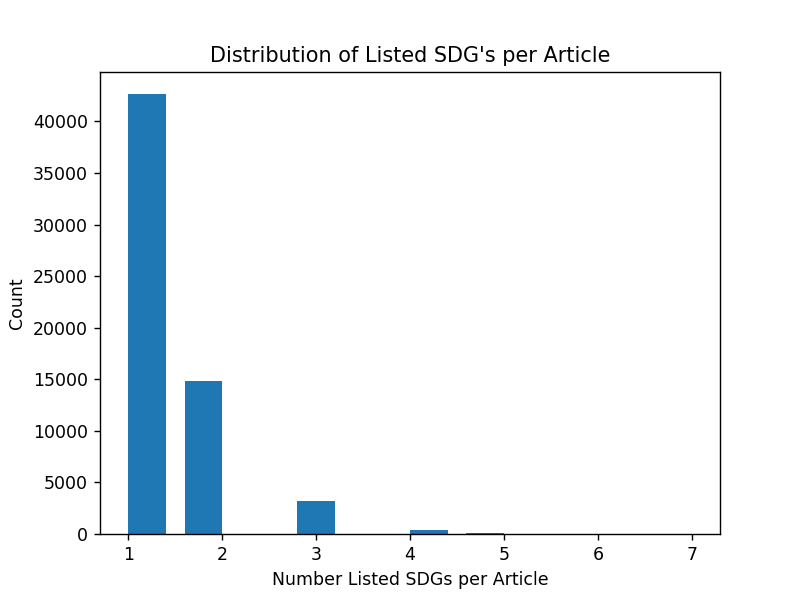

In [19]:
# visualise the distribution 

description = "Number_Listed_SDGs_per_Article" # Note the "" used here

plt.figure(1)
plt.hist(df.no_listed_sdg, bins=10, width=0.4)
plt.ylabel('Count')
plt.xlabel('Number of Listed SDGs per Article')
plt.title("Distribution of Listed SDG's per Article")
plt.savefig('../../reports/figures/exploratory_data_analysis_visualisations/[%s]-[%s]-[%s].png'%(nb_name,\
                                                                                                 dataset_1,\
                                                                                                 description))
plt.show()